# **CROWDFUNDING ANALYSIS**
### Using kiva.org datsets

📌 **Tentang Kiva**

kiva.org adalah sebuah platform online non-profit untuk crowdfunding yang memungkinkan individu dapat meminjam dana untuk keperluan bisnis. Misinya adalah untuk meningkatkan kesejahteraan warga marginal (terutama low-income entrepreneurs and students) di beberapa negara. Crowdfunding (urun dana) adalah aktivitas pengumpulan dana modal dari beberapa individu untuk membiayai usaha bisnis baru.


Deskripsi kolom: 

Berikut adalah deskripsi dari masing-masing kolom:
- `id`: Unique ID untuk masing-masing loan (loan ID)
- `funded_amount`: Jumlah yang dicairkan oleh Kiva ke agen (USD)
- `loan_amount`: Jumlah yang disalurkan oleh agen ke peminjam (USD)

	Keterangan tambahan:
	+ loan_amount adalah jumlah dana yang dibutuhkan oleh borrower (peminjam).
	+ funded_amount biasanya sama atau lebih kecil dari loan_amount:

	Sama: Jika seluruh jumlah yang dibutuhkan berhasil terkumpul.

	Lebih kecil: Jika belum seluruhnya terkumpul, tetapi Kiva memutuskan tetap mendistribusikan sebagian yang sudah terkumpul.

- `activity`: Kategori lebih spesifik dari `sector`
- `sector`: Kategori dari loan
- `country`: Nama negara lengkap, tempat pinjaman dicairkan
- `region`: Nama wilayah lengkap dari `country`
- `currency`: Mata uang
- `partner_id`: ID untuk organisasi partner
- `posted_time`: Waktu pinjaman di-posting di Kiva oleh agen
- `funded_time`: Waktu pinjaman telah sepenuhnya dibiayai oleh pemberi pinjaman
- `term_in_months`: Durasi pencairan pinjaman (dalam satuan bulan)
- `lender_count`: Banyaknya peminjam yang berkontribusi
- `repayment_interval`: Cara pelunasan peminjaman

In [1]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from datetime import datetime
from operator import attrgetter
import warnings
warnings.filterwarnings('ignore')

# Column
pd.set_option('display.max.columns', None)

# Off Scientific Notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
df = pd.read_csv('kiva_loan.csv')
df.head(2)

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
0,653051,300.00,300.00,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,Lahore,PKR,247.00,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,12.00,12,irregular
1,653053,575.00,575.00,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,Pakistan,Lahore,PKR,247.00,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00,11.00,14,irregular


In [4]:
# Cek Duplikat
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country             671205 non-null  object 
 7   region              614405 non-null  object 
 8   currency            671205 non-null  object 
 9   partner_id          657698 non-null  float64
 10  posted_time         671205 non-null  object 
 11  funded_time         622874 non-null  object 
 12  term_in_months      671205 non-null  float64
 13  lender_count        671205 non-null  int64  
 14  repayment_interval  671205 non-null  object 
dtypes: float64(4), int64(2), object(9)

In [6]:
# Isi Missing Value kolom 'use'
df['use'] = df['use'].fillna(value= 'Unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 671205 non-null  object 
 6   country             671205 non-null  object 
 7   region              614405 non-null  object 
 8   currency            671205 non-null  object 
 9   partner_id          657698 non-null  float64
 10  posted_time         671205 non-null  object 
 11  funded_time         622874 non-null  object 
 12  term_in_months      671205 non-null  float64
 13  lender_count        671205 non-null  int64  
 14  repayment_interval  671205 non-null  object 
dtypes: float64(4), int64(2), object(9)

In [7]:
# Isi Missing Value kolom 'region'
df['region'] = df['region'].fillna(value=df['country'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 671205 non-null  object 
 6   country             671205 non-null  object 
 7   region              671205 non-null  object 
 8   currency            671205 non-null  object 
 9   partner_id          657698 non-null  float64
 10  posted_time         671205 non-null  object 
 11  funded_time         622874 non-null  object 
 12  term_in_months      671205 non-null  float64
 13  lender_count        671205 non-null  int64  
 14  repayment_interval  671205 non-null  object 
dtypes: float64(4), int64(2), object(9)

In [8]:
# Isi Missing Value kolom 'partner_id' dengan 0/Unknown
df['partner_id'] = df['partner_id'].fillna(value='Unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 671205 non-null  object 
 6   country             671205 non-null  object 
 7   region              671205 non-null  object 
 8   currency            671205 non-null  object 
 9   partner_id          671205 non-null  object 
 10  posted_time         671205 non-null  object 
 11  funded_time         622874 non-null  object 
 12  term_in_months      671205 non-null  float64
 13  lender_count        671205 non-null  int64  
 14  repayment_interval  671205 non-null  object 
dtypes: float64(3), int64(2), object(10

In [9]:
df['term_in_months'] = df['term_in_months'].astype('int64')
df['posted_time'] = pd.to_datetime(df['posted_time'])
df['funded_time'] = pd.to_datetime(df['funded_time'])
df['id'] = df['id'].astype('object')
cat = ['sector', 'country', 'currency']
df[cat] = df[cat].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  671205 non-null  object             
 1   funded_amount       671205 non-null  float64            
 2   loan_amount         671205 non-null  float64            
 3   activity            671205 non-null  object             
 4   sector              671205 non-null  category           
 5   use                 671205 non-null  object             
 6   country             671205 non-null  category           
 7   region              671205 non-null  object             
 8   currency            671205 non-null  category           
 9   partner_id          671205 non-null  object             
 10  posted_time         671205 non-null  datetime64[ns, UTC]
 11  funded_time         622874 non-null  datetime64[ns, UTC]
 12  term_in_months  

In [10]:
df.to_csv('kiva_loan_clean.csv')

---

## **Exploratory Data Analysis (EDA)**

In [86]:
df_fix = df.copy()
df_fix.head(1)

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
0,653051,300.00,300.00,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,Lahore,PKR,247.00,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,12,12,irregular


In [87]:
# Kolom Terpenuhi --> funded amount = loan amount
df_fix['Terpenuhi'] = np.where(df_fix['funded_amount'] == df_fix['loan_amount'], 'Terpenuhi', 'Tidak Terpenuhi')
df_fix.head(1)

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval,Terpenuhi
0,653051,300.00,300.00,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,Lahore,PKR,247.00,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,12,12,irregular,Terpenuhi


In [88]:
# Data Untuk Lokasi Peminjam di Indonesia
ind_fund = df_fix[df_fix['country']=='Indonesia']

**1. Apakah Indonesia Layak diberikan Pinjaman?**

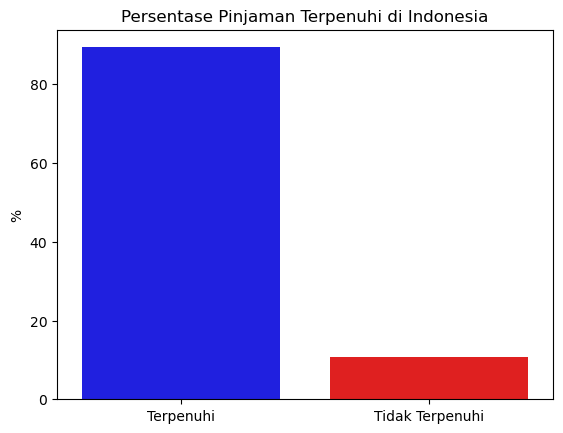

In [89]:
terpenuhi = ind_fund.groupby(by='Terpenuhi')[['Terpenuhi']].count()
terpenuhi.rename(columns={'Terpenuhi': 'Jumlah'}, inplace=True)
terpenuhi['%'] = (terpenuhi['Jumlah']/terpenuhi['Jumlah'].sum())*100
terpenuhi
sns.barplot(data=terpenuhi, x='Terpenuhi', y='%', palette=['blue', 'red'])
plt.title('Persentase Pinjaman Terpenuhi di Indonesia')
plt.xlabel(None)
plt.show()

✨Insight:
- Negara Indonesia masih layak untuk diberikan pinjaman karena lebih banyak case pinjaman yang terpenuhi jumlahnya dibandingkan yang tidak terpenuhi jumlahnya.

**2. Top 5 Sektor yang Paling Banyak Menerima Pinjaman di Indonesia**

In [90]:
all_sector = ind_fund.groupby(by='sector')[['funded_amount']].sum().reset_index()
all_sector = all_sector.sort_values(by='funded_amount', ascending=False)
all_sector

,sector,funded_amount
0,Agriculture,1076075.00
11,Retail,1006900.00
8,Housing,836775.00
12,Services,591675.00
1,Arts,308100.00
6,Food,273275.00
10,Personal Use,244500.00
4,Education,155000.00
2,Clothing,15125.00
3,Construction,14075.00


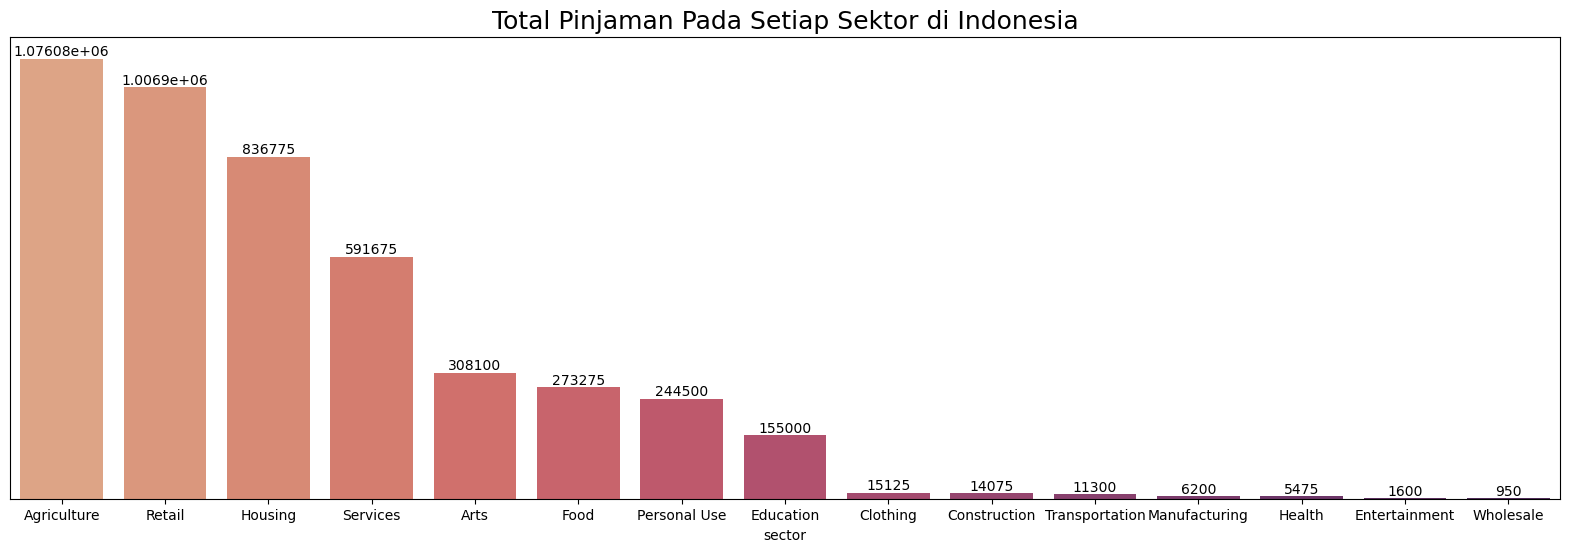

In [95]:
plt.figure(figsize=(20,6))
plt.title('Total Pinjaman Pada Setiap Sektor di Indonesia', size=18)
barplot = sns.barplot(data=all_sector, x='sector', y='funded_amount', order=all_sector['sector'], palette='flare')
for container in barplot.containers:
    barplot.bar_label(container, label_type='edge')
plt.ylabel("")  
plt.yticks([])
plt.show()

**3. Median Loan Amount pada Masing-masing Sektor**

In [97]:
from scipy.stats import shapiro

stats, pvalue = shapiro(ind_fund['loan_amount'])
if pvalue <= 0.05:
    print(f"pvalue = {pvalue} --> H0 ditolak, data terdistribusi tidak normal")
else:
    print(f"pvalue = {pvalue} --> H0 gagal ditolak, data terdistribusi normal")

pvalue = 6.57994758225975e-92 --> H0 ditolak, data terdistribusi tidak normal


In [104]:
medi = ind_fund.groupby(by='sector')[['loan_amount']].median().reset_index()
medi = medi.sort_values(by='loan_amount', ascending=False)

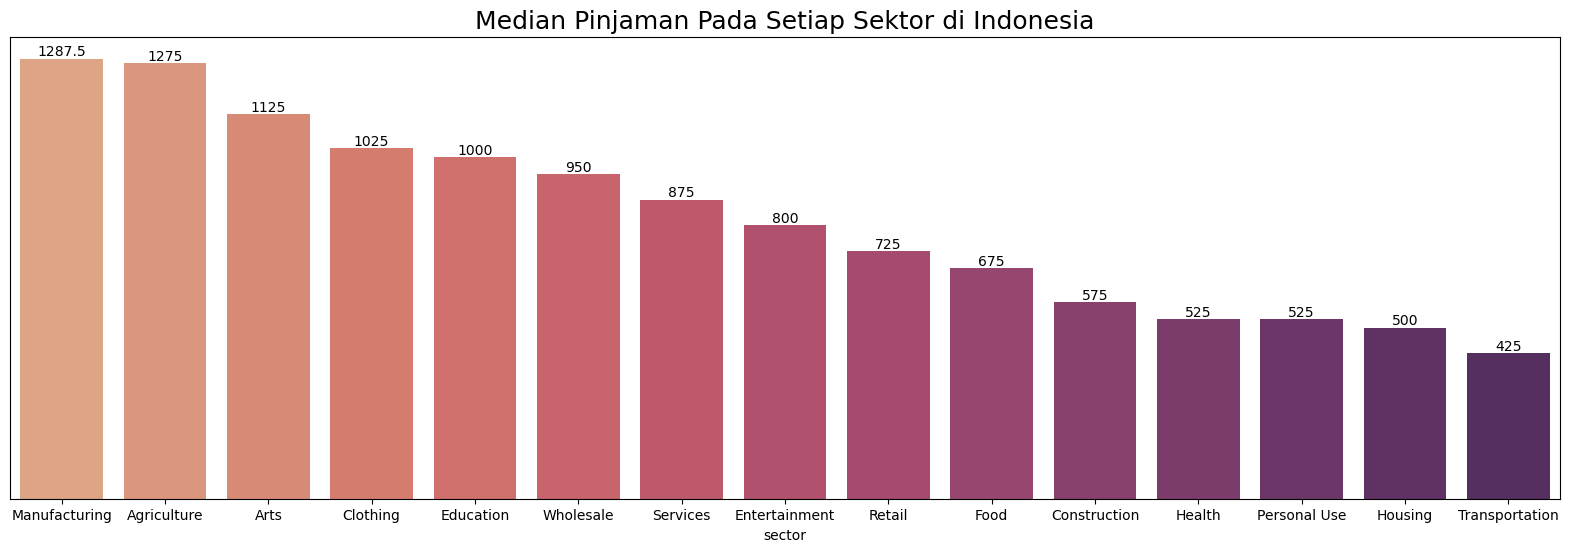

In [105]:
plt.figure(figsize=(20,6))
plt.title('Median Pinjaman Pada Setiap Sektor di Indonesia', size=18)
barplot = sns.barplot(data=medi, x='sector', y='loan_amount', order=medi['sector'], palette='flare')
for container in barplot.containers:
    barplot.bar_label(container, label_type='edge')
plt.ylabel("")  
plt.yticks([])
plt.show()

**4. Median Jumlah Pemberi Pinjaman pada Masing-masing Sektor**

In [111]:
from scipy.stats import shapiro

stats, pvalue = shapiro(ind_fund['lender_count'])
if pvalue <= 0.05:
    print(f"pvalue = {pvalue} --> H0 ditolak, data terdistribusi tidak normal")
else:
    print(f"pvalue = {pvalue} --> H0 gagal ditolak, data terdistribusi normal")

pvalue = 6.610904957285602e-92 --> H0 ditolak, data terdistribusi tidak normal


In [108]:
rata2_lender = ind_fund.groupby(by='sector')[['lender_count']].median().reset_index()
rata2_lender = rata2_lender.sort_values(by='lender_count', ascending=False)

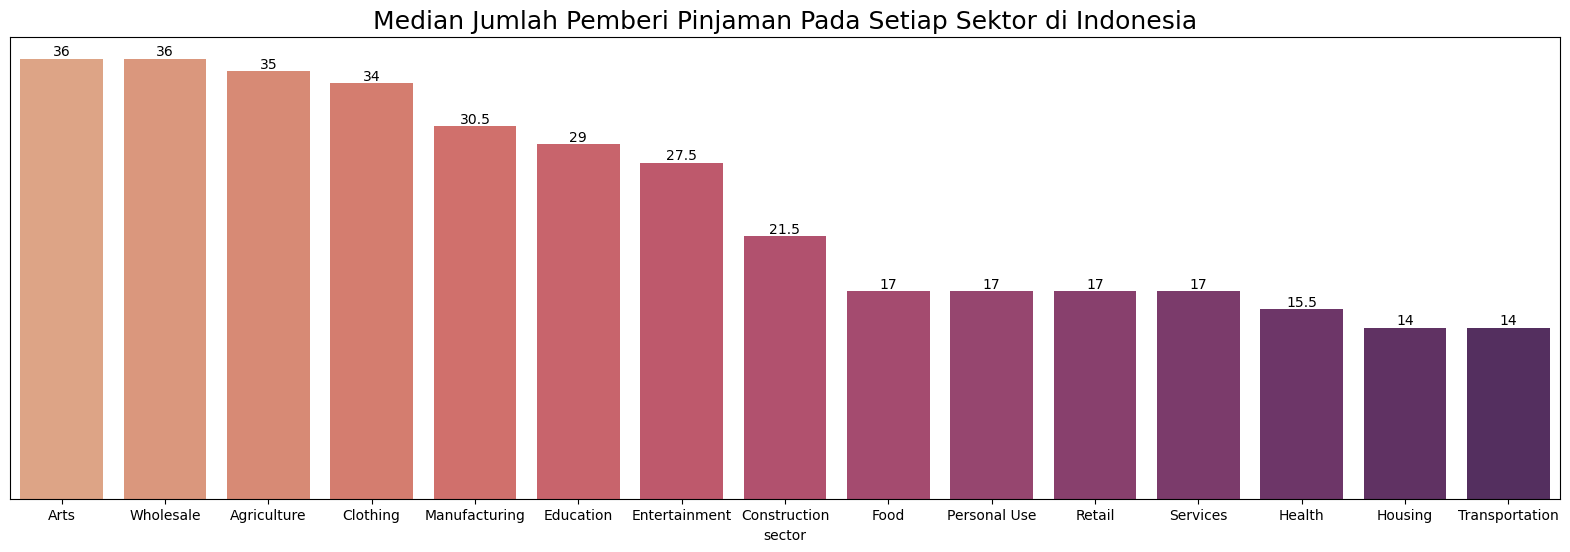

In [ ]:
plt.figure(figsize=(20,6))
plt.title('Median Jumlah Pemberi Pinjaman Pada Setiap Sektor di Indonesia', size=18)
barplot = sns.barplot(data=rata2_lender, x='sector', y='lender_count', order=rata2_lender['sector'], palette='flare')
for container in barplot.containers:
    barplot.bar_label(container, label_type='edge')
plt.ylabel("")  
plt.yticks([])
plt.show()

✨Insight Berdasarkan Barplot Total Peminjaman, Median Peminjaman, dan Median Jumlah Lender(Pemberi Pinjaman):
- Sektor dengan total pinjaman yang besar belum tentu memiliki jumlah pememberi pinjaman yang banyak. Total pinjaman yang besar bisa disebabkan oleh median pinjaman pada suatu sektor yang memang tinggi sehingga memperbesar nilai total pinjamannya.
- Untuk menentukan tingkat kepercayaan pemberian pinjaman pada suatu sektor dapat dilihat dari rata-rata jumlah pemberi pinjaman. Semakin banyak pemberi pinjaman, maka akan lebih dipercaya.

**5. Analisis Resiko Pemberian Pinjaman Berdasarkan Repayment Interval**

In [112]:
ind_fund['repayment_interval'].unique()

array(['bullet', 'irregular', 'monthly'], dtype=object)

**Repayment Interval:**
- Bullet --> Dibayar sekaligus di akhir periode. Cukup beresiko karena peminjam mengembalikan dana dalam satu waktu saja.
- Irregular --> Pembayaran tidak teratur. Beresiko tinggi bermasalah dalam proses pengembalikan dana pinjaman.
- Monthly --> Dibayar setiap bulan (bulanan). Resiko cukup rendah untuk bermasalah karena lebih ringan bagi peminjam.

In [174]:
repay = ind_fund.pivot_table(index='sector',
                     columns='repayment_interval',
                     aggfunc='size').div(repay.sum(axis=1), axis=0)*100
repay

repayment_interval,bullet,irregular,monthly
sector,,,
Agriculture,8.05,85.71,6.23
Arts,59.06,38.01,2.92
Clothing,0.00,64.29,35.71
Construction,0.00,50.00,50.00
Education,0.00,87.30,12.70
Entertainment,0.00,100.00,0.00
Food,0.00,85.00,15.00
Health,33.33,66.67,0.00
Housing,0.00,99.49,0.51


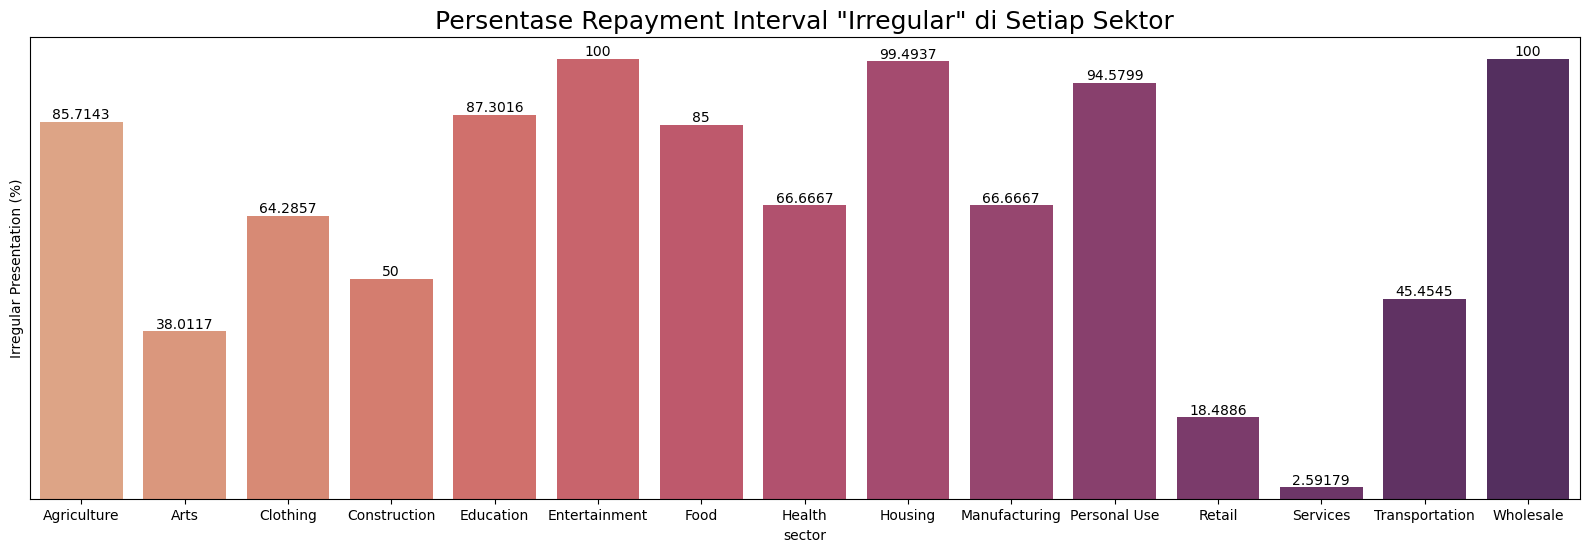

In [178]:
plt.figure(figsize=(20,6))
plt.title('Persentase Repayment Interval "Irregular" di Setiap Sektor', size=18)
barplot = sns.barplot(data=repay, x="sector", y="irregular", palette="flare")
for container in barplot.containers:
    barplot.bar_label(container, label_type='edge')
plt.ylabel("Irregular Presentation (%)")  
plt.yticks([])
plt.show()

✨Insight:
Sektor Entertainment, Housing, dan Personal Use memiliki persentase jumlah kasus peminjaman dengan menggunakan repayment interval secara irregular tertinggi. Dengan demikian, kurang direkomendasikan ketiga sektor tersebut karena memiliki resiko tinggi untuk mengalami permasalahan dalam proses pengembalian dana pinjaman.

